<a href="https://colab.research.google.com/github/Gustavo-Ros/Simulacion-1/blob/main/Montearlo_AciertoError.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def g(x):       #Esta función calcula los valores gi(x_i) y las guarda en una lista
  g_i=np.sqrt(np.arctan(x))
  return g_i

In [38]:
def aceptacion_rechazo(n,Ui,g_i,a,b,c):     #Esta función aplica la condición de Aceptación y rechazo
  aciertos=0
  for i in range(n):
    if c*Ui[i-1] < g_i[i-1]:                #Condición de aceptación
      aciertos+=1                           #Aumenta el no. de acierto en +1
  I=c*(b-a)*aciertos/n                      #Calcula la estimación mediante la media muestral
  return I

In [39]:
def exp(n,a,b,c):                           #Esta función realiza los experimentos
  Ui1=np.random.uniform(0, 1, n)            #Genera primer número aleatorio
  Ui2=np.random.uniform(0, 1, n)            #Genera segundo número aleatorio

  Xi=a+Ui1*(b-a)                            #Calcula la lista Xi
  g_i=g(Xi)                                 #Calcula la lista gi

  I=aceptacion_rechazo(n,Ui2,g_i,a,b,c)

  return I

In [40]:
def histograma(aprox):
  plt.hist(aprox, bins=25, color='green', alpha=0.7)
  plt.title('1000 experimentos de 50 iteraciones')
  plt.axvline(np.mean(aprox),label='Media')
  plt.xlabel('Valor de la integral')
  plt.ylabel('Frecuencia')
  plt.legend()
  print('Estimación: ', np.mean(aprox))
  return

Estimación:  0.625321718599466


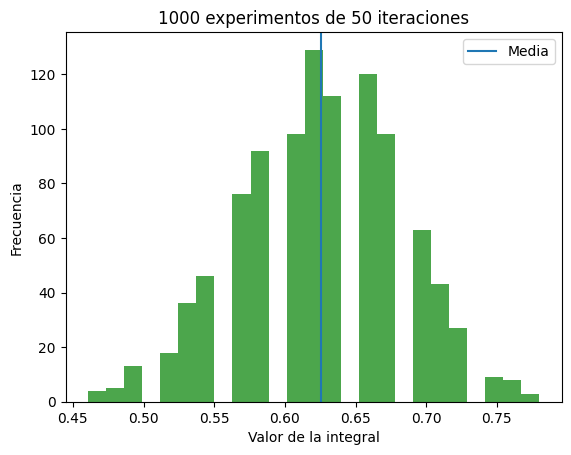

In [50]:
#Simulacion

#Parametros
m=1000                          #Número de iteraciones
n=50                            #Tamaño de la experimentos
a=0                             #Límite inferior de la integral
b=1                             #Límite superior de la integral
c=np.sqrt(np.arctan(1))         #Cota superior g(x)<c
aprox=[]

for i in range(m):              #Simulación de m experimentos
  aprox.append(exp(n,a,b,c))

histograma(aprox)